Implementation of PCA on a test set

In [54]:
import numpy as np


In [55]:
def simu_vectors(n_components : int, low : float, high : float) -> np.array :
    out = []
    for i in range(n_components):
        value = np.random.uniform(low, high)
        out.append(value)
    return np.array(out)

In [56]:
def simu_dataset(n_values : int, n_components : int, low : float, high : float) -> np.array :
    out = []
    for i in range(n_values):
        vector = simu_vectors(n_components, low, high)
        out.append(vector)
    return np.array(out)

In [57]:
X = simu_dataset(100, 5, -10, 10)

In [67]:
# On crée des données corrélées (une forme allongée)
# On part de 2 vraies variables
Vraies_Valeurs = np.random.uniform(0, 10, (100, 2))

# On crée 3 autres colonnes qui ne sont que des copies des 2 premières (+ un peu de bruit)
# Cela simule des données redondantes (dimension intrinsèque faible)
Col3 = Vraies_Valeurs[:, 0] * 2 + np.random.normal(0, 1, 100)
Col4 = Vraies_Valeurs[:, 1] - 5 + np.random.normal(0, 1, 100)
Col5 = Vraies_Valeurs[:, 0] + Vraies_Valeurs[:, 1]

# On empile tout pour faire une matrice (100, 5)
X_raw = np.column_stack((Vraies_Valeurs, Col3, Col4, Col5))

# --- ENSUITE TU RELANCES TON CODE PCA (Centrage -> Sigma -> Eigh -> Projection) ---

In [58]:
X

array([[ 9.17489373, -0.16342703,  8.87234149, -9.37218432, -3.16583076],
       [ 9.19706713, -7.05427112, -1.43249755, -2.68667528, -7.31221244],
       [-3.25601905,  1.15750488, -5.91649653,  4.53393581, -3.39554052],
       [ 4.49359567,  6.17487804, -6.84215822, -4.5958345 , -2.44390172],
       [ 6.82082036, -1.69187506, -2.8731367 , -5.79635189,  9.54016   ],
       [-3.23010566,  9.05824816,  9.8314882 , -2.88042689,  8.22859295],
       [ 0.19050215, -5.61644623,  7.83028105,  6.5316526 ,  4.26352849],
       [ 8.68356686, -7.98366369, -7.15357271, -6.43465352, -4.79998784],
       [ 9.82522749, -9.15303893,  9.80177563,  3.41087851,  6.50851823],
       [-2.918874  ,  9.88885823, -4.45574737, -7.60730583,  9.3097273 ],
       [-6.02832384, -5.115171  , -9.9437829 , -3.62036944,  5.75846927],
       [-8.5874956 , -0.71214324, -6.93251028,  3.79156743,  6.50060649],
       [ 1.68599908, -2.05146685, -3.49441405, -9.13957106, -7.3581362 ],
       [-4.71943936, -9.38627756,  5.5

Matrice de covariance

In [59]:
Sigma = np.dot(X.T,X)*(1/100)

Valeurs propres et vecteurs propres

In [60]:
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)

In [61]:
sorted_indices = np.argsort(eigenvalues)[::-1]

# On réorganise les valeurs et vecteurs
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [62]:
eigenvectors_2 = eigenvectors[:,:2]
eigenvectors_2

array([[-0.26336227, -0.58440088],
       [-0.44539422, -0.206366  ],
       [-0.22494772,  0.61277408],
       [ 0.07553322,  0.45859051],
       [-0.82216638,  0.1734686 ]])

Projection

In [63]:
X_proj = np.dot(X,eigenvectors_2)

In [64]:
X_proj

array([[ -2.44441603,  -4.73851624],
       [  6.85093018,  -7.29733275],
       [  4.80703105,  -0.47132471],
       [ -0.73241494, -10.62458968],
       [ -8.67790575,  -6.40076542],
       [-12.3782147 ,   6.14930931],
       [ -2.32201536,   9.58084943],
       [  6.33849222, -11.59416947],
       [ -5.80922097,   4.84649861],
       [-10.86215787,  -4.93899108],
       [  1.09485397,  -2.17609079],
       [ -0.9199316 ,   3.78386741],
       [  6.61501442,  -8.1709588 ],
       [ 10.40031082,   5.51527765],
       [ -9.68461193,  -6.59646535],
       [  8.55798401, -11.18619914],
       [  7.22343714,  -1.32131963],
       [ -6.32199507,  -5.8851239 ],
       [ -2.31025943,   5.25635832],
       [ -1.41518874,  -6.84210065],
       [  6.63555393,   9.05434439],
       [ -2.8582894 ,   7.978969  ],
       [ -1.52147628,  -8.78424042],
       [  4.60987375,  -5.41198968],
       [ -4.3582559 ,   6.20400882],
       [  1.50649089,  -6.28118619],
       [  3.95442094,   3.98633699],
 

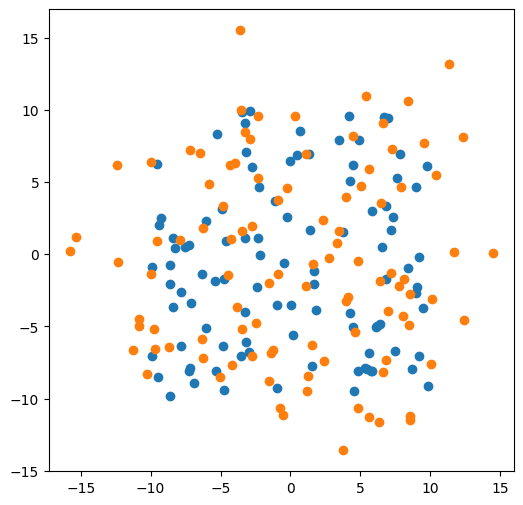

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X_proj[:,0], X_proj[:,1])